In [3]:
pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


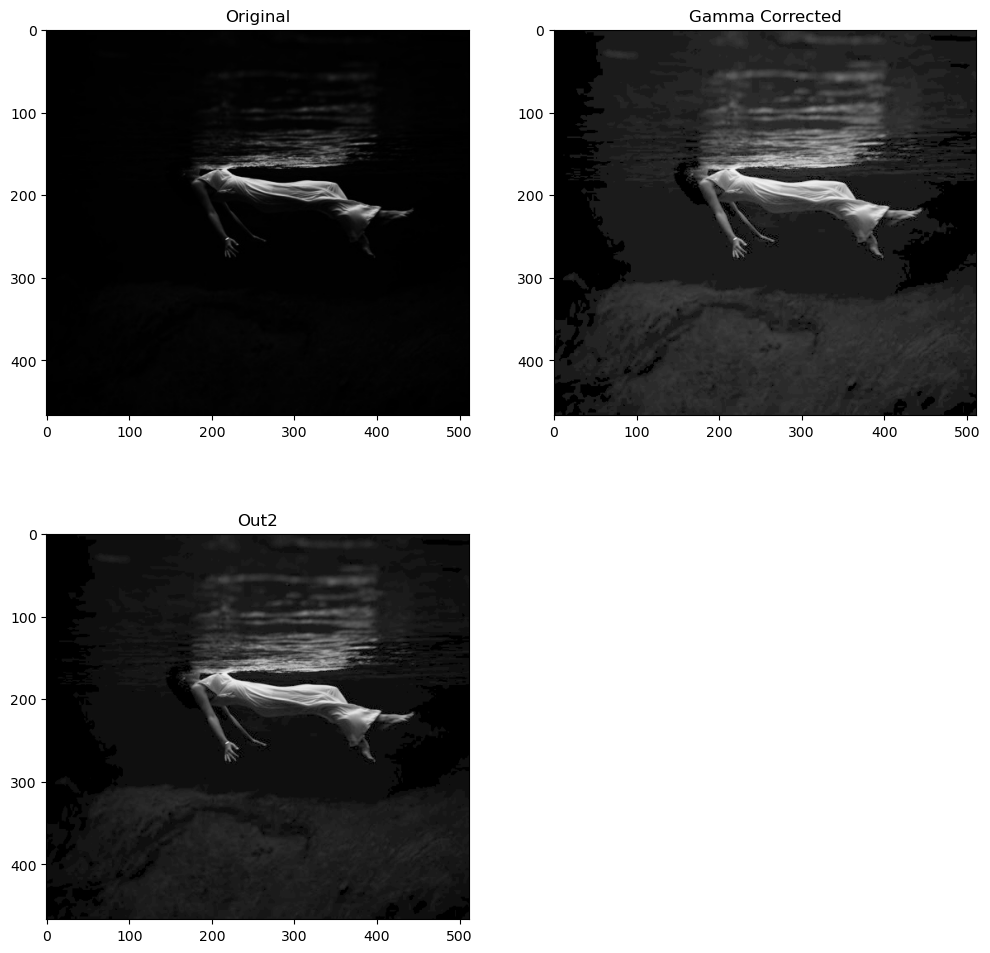

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(I_in, c, gamma):
    # Step 1: Normalize image
    I_norm = I_in.astype('float32') / 255
    
    # Step 2: Apply power law transformation
    I_gamma = c * (I_norm ** gamma)
    
    # Step 3: Rescale back to 0–255 range and convert to uint8
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')
    
    return I_out
# Set gamma value
gamma = 0.4  # <1 to brighten an underexposed image

# Read the original image
img_original = cv2.imread("5.jpg")

# Create a lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction using the lookup table
out = cv2.LUT(img_original, lookUpTable)



out2 = gamma_correction(img_original, 1, 0.5)




# Display original and corrected images side by side
plt.figure(figsize=[12, 12])
plt.subplot(221)
plt.imshow(img_original[..., ::-1])  # Convert BGR → RGB
plt.title("Original")
plt.subplot(222)
plt.imshow(out[..., ::-1])
plt.title("Gamma Corrected")
plt.subplot(223)
plt.imshow(out2[...,::-1])
plt.title("Out2")
plt.show()

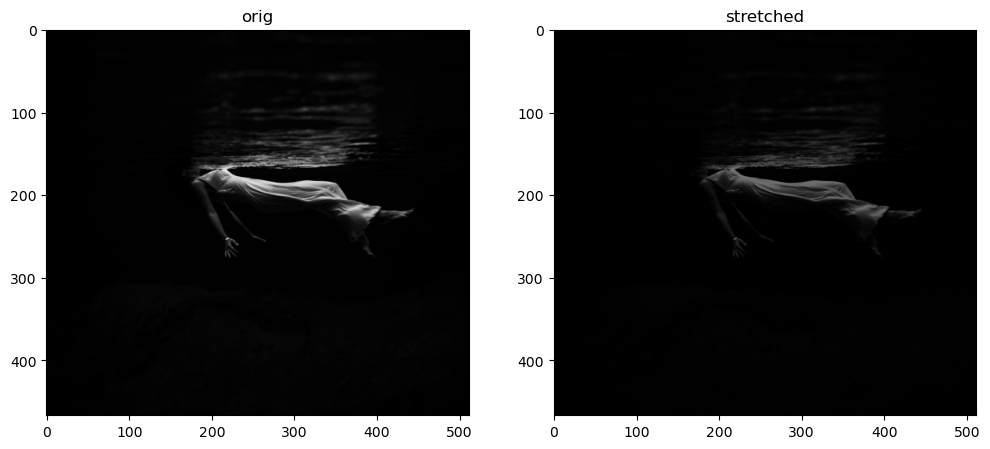

In [55]:
import cv2
import numpy as np

def contrast_stretching(i_in, s_min=0, s_max=255):
    """
    Apply linear contrast stretching to an input image.

    Parameters:
    i_in : ndarray
        Input image (grayscale or color)
    s_min : float
        Minimum output intensity
    s_max : float
        Maximum output intensity

    Returns:
    i_out : ndarray
        Output image after contrast stretching
    """
    r_min = np.min(i_in)
    r_max = np.max(i_in)

    if r_max == r_min:
        # Avoid division by zero
        return np.zeros_like(i_in, dtype='uint8')

    i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min
    i_out = np.clip(i_out, s_min, s_max).astype('uint8')

    return i_out


# Read grayscale image
img = cv2.imread("5.jpg")

# Apply contrast stretching
img_stretched = contrast_stretching(img, s_min=0, s_max=120)

plt.figure(figsize=[12, 12])

plt.subplot(1,2,1)
plt.imshow(img[...,::-1]) 
plt.title("orig")

plt.subplot(1,2,2)
plt.imshow(img_stretched[...,::-1])
plt.title("stretched")

plt.show()